In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [3]:
food = pd.read_csv('./Data/seogyodong.csv')
food.head()

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,시간대_06~11_매출_비율,연령대_20_매출_비율,점포수
0,2021,1,A,골목상권,11440,마포구,11440660,서교동,1000466,동교로17길,CS100001,한식음식점,243935896,1,14,14
1,2021,1,A,골목상권,11440,마포구,11440660,서교동,1000466,동교로17길,CS100002,중식음식점,45393178,0,19,1
2,2021,1,A,골목상권,11440,마포구,11440660,서교동,1000466,동교로17길,CS100003,일식음식점,55589434,0,22,3
3,2021,1,A,골목상권,11440,마포구,11440660,서교동,1000466,동교로17길,CS100006,패스트푸드점,9925407,5,36,3
4,2021,1,A,골목상권,11440,마포구,11440660,서교동,1000466,동교로17길,CS100008,분식전문점,40136157,0,30,6


### 계획 
1) 매출금액이 현저히 낮거나 한 데이터들을 찾아 없애야 된다. <br><br>
2) 사용할 feature를 골라야 한다. <br><br>
    - 점포수 관련 <br><br>
    - 직장인구 수 관련 <br><br>
    - 집객시설 관련 <br><br>
    - 주변 아파트 시세 관련 <br><br>
3) 예측 모델을 만든다. <br><br>

### 1번 계획을 실행해 보자.

In [4]:
food.sort_values(by='분기당_매출_금액')

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,시군구코드,시군구명,행정동_코드,행정동_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,시간대_06~11_매출_비율,연령대_20_매출_비율,점포수
27,2014,1,A,골목상권,11440,마포구,11440660,서교동,1000466,동교로17길,CS100003,일식음식점,3160782,0,20,3
22,2021,4,A,골목상권,11440,마포구,11440660,서교동,1000466,동교로17길,CS100008,분식전문점,3276244,0,45,6
1513,2021,2,A,골목상권,11440,마포구,11440660,서교동,1000504,월드컵로8길,CS100007,치킨전문점,3991106,0,25,3
1507,2021,1,A,골목상권,11440,마포구,11440660,서교동,1000504,월드컵로8길,CS100007,치킨전문점,4701580,0,7,3
1486,2019,4,A,골목상권,11440,마포구,11440660,서교동,1000499,월드컵로16길,CS100009,호프-간이주점,4816084,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,2020,1,A,골목상권,11440,마포구,11440660,서교동,1000491,양화로11길,CS100001,한식음식점,2396353730,0,32,12
810,2019,3,A,골목상권,11440,마포구,11440660,서교동,1000491,양화로11길,CS100001,한식음식점,2413661626,0,37,13
638,2018,4,A,골목상권,11440,마포구,11440660,서교동,1000488,신촌로12길,CS100001,한식음식점,2494289631,1,32,35
667,2019,4,A,골목상권,11440,마포구,11440660,서교동,1000488,신촌로12길,CS100001,한식음식점,2558983414,1,25,36


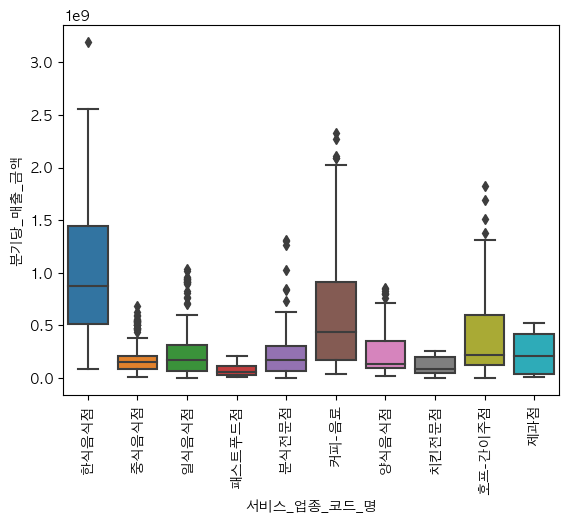

In [5]:
# 박스플롯 확인하기
sns.boxplot(
	x='서비스_업종_코드_명',
    y='분기당_매출_금액',
    data=food
)

plt.xticks(rotation=90)

plt.show()

### 이상치는 없는 것 같다. 다행히도 최소값이 300만원

### 필요없는 컬럼 없애기

In [6]:
food=food.iloc[:,[0,1,8,9,10,11,12,13,14,15]]

### 데이터 개수 확인하기

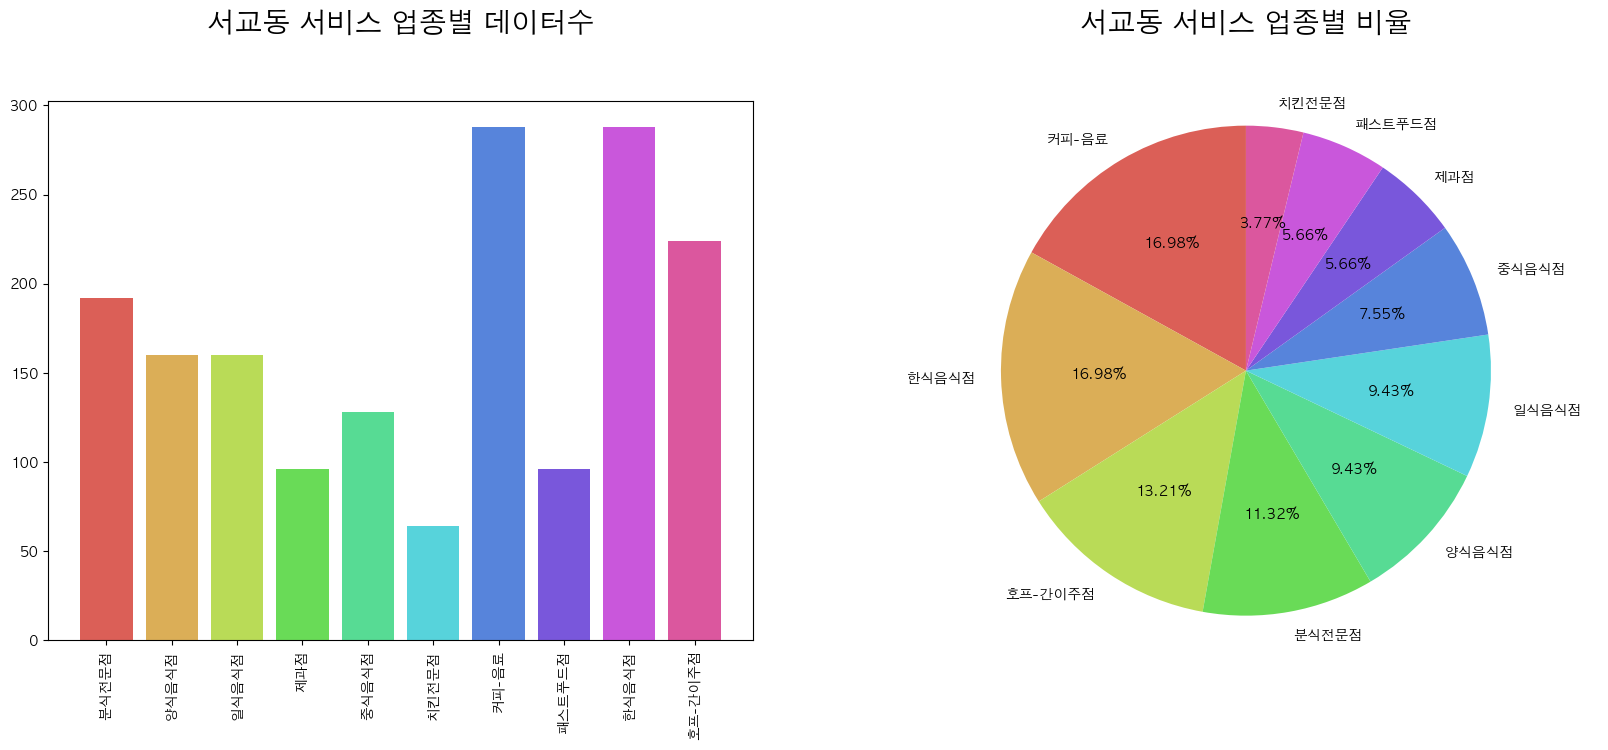

In [7]:
# 서비스 업종 코드 별
table = pd.DataFrame(food.pivot_table(index=['서비스_업종_코드_명'],aggfunc='size'))

fig , axs = plt.subplots(1,2,figsize=(20,7))
colors = sns.color_palette('hls',len(table.index))

axs[0].bar(
    x=table.index,
    height = table[0],
    color = colors
)

table[0].sort_values(ascending=False).plot(
    kind='pie',
    autopct='%.2f%%', # 소수 두째짜리까지 나타내고 %를 붙인다. 
    startangle=90,
    colors=colors

)

axs[0].set_xticklabels(labels=table.index,rotation=90)
axs[1].axis('equal')
axs[1].set_title('서교동 서비스 업종별 비율',size=20,pad=50)
axs[0].set_title('서교동 서비스 업종별 데이터수',size=20,pad=50)
axs[1].set_ylabel('')
plt.show()

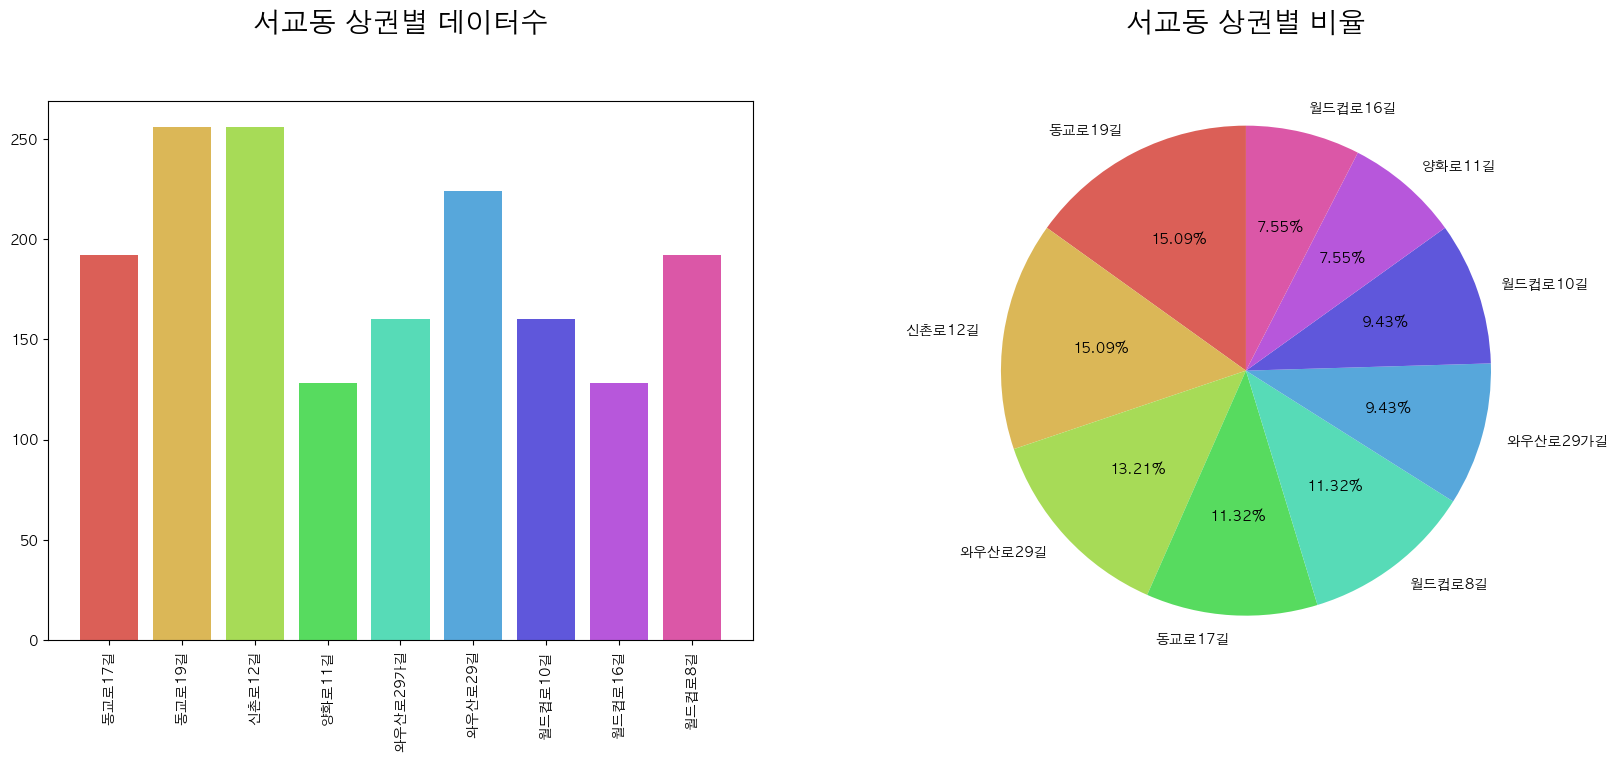

In [8]:
# 상권 코드 별
table=pd.DataFrame(food.pivot_table(index=['상권_코드_명'],aggfunc='size'))

fig , axs = plt.subplots(1,2,figsize=(20,7))
colors = sns.color_palette('hls',len(table.index))

axs[0].bar(
    x=table.index,
    height = table[0],
    color = colors
)

table[0].sort_values(ascending=False).plot(
    kind='pie',
    autopct='%.2f%%', # 소수 두째짜리까지 나타내고 %를 붙인다. 
    startangle=90,
    colors=colors

)

axs[0].set_xticklabels(labels=table.index,rotation=90)
axs[1].axis('equal')
axs[1].set_title('서교동 상권별 비율',size=20,pad=50)
axs[0].set_title('서교동 상권별 데이터수',size=20,pad=50)
axs[1].set_ylabel('')
plt.show()

### 상권별 , 업종별 , 상권별 + 업종별 데이터 분포 보기

In [9]:
food

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,시간대_06~11_매출_비율,연령대_20_매출_비율,점포수
0,2021,1,1000466,동교로17길,CS100001,한식음식점,243935896,1,14,14
1,2021,1,1000466,동교로17길,CS100002,중식음식점,45393178,0,19,1
2,2021,1,1000466,동교로17길,CS100003,일식음식점,55589434,0,22,3
3,2021,1,1000466,동교로17길,CS100006,패스트푸드점,9925407,5,36,3
4,2021,1,1000466,동교로17길,CS100008,분식전문점,40136157,0,30,6
...,...,...,...,...,...,...,...,...,...,...
1691,2020,4,1000504,월드컵로8길,CS100002,중식음식점,148734314,0,24,2
1692,2020,4,1000504,월드컵로8길,CS100003,일식음식점,327606908,0,31,4
1693,2020,4,1000504,월드컵로8길,CS100007,치킨전문점,5339921,0,25,3
1694,2020,4,1000504,월드컵로8길,CS100009,호프-간이주점,53510321,1,49,5


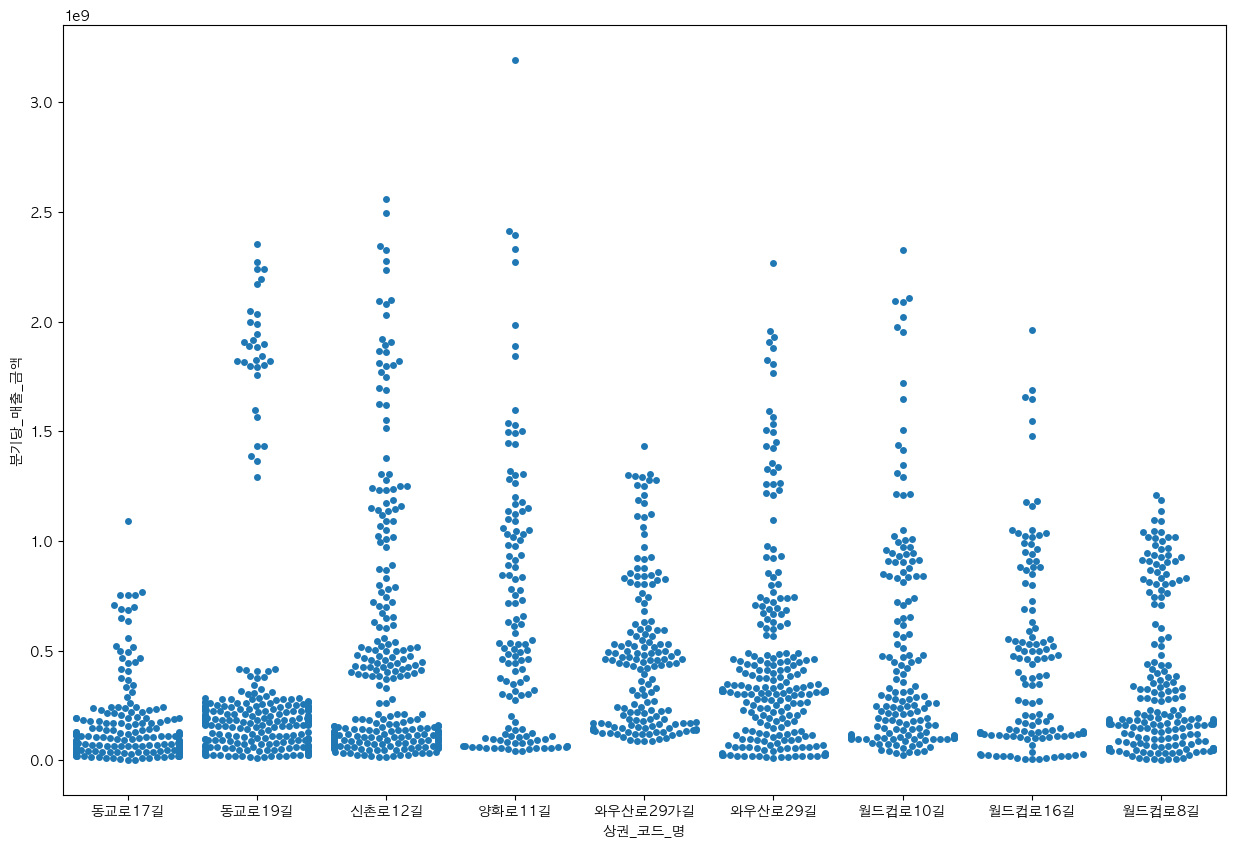

In [10]:
plt.figure(figsize=(15,10))

sns.swarmplot(
    x='상권_코드_명',
    y='분기당_매출_금액',
    data=food
)

plt.show()

### 상권별로 나누었을 때는 밑에 쪽에 분포가 다 쏠리게 나와있다. 그러므로 feature로는 사용할 수 없을 것 같다. 

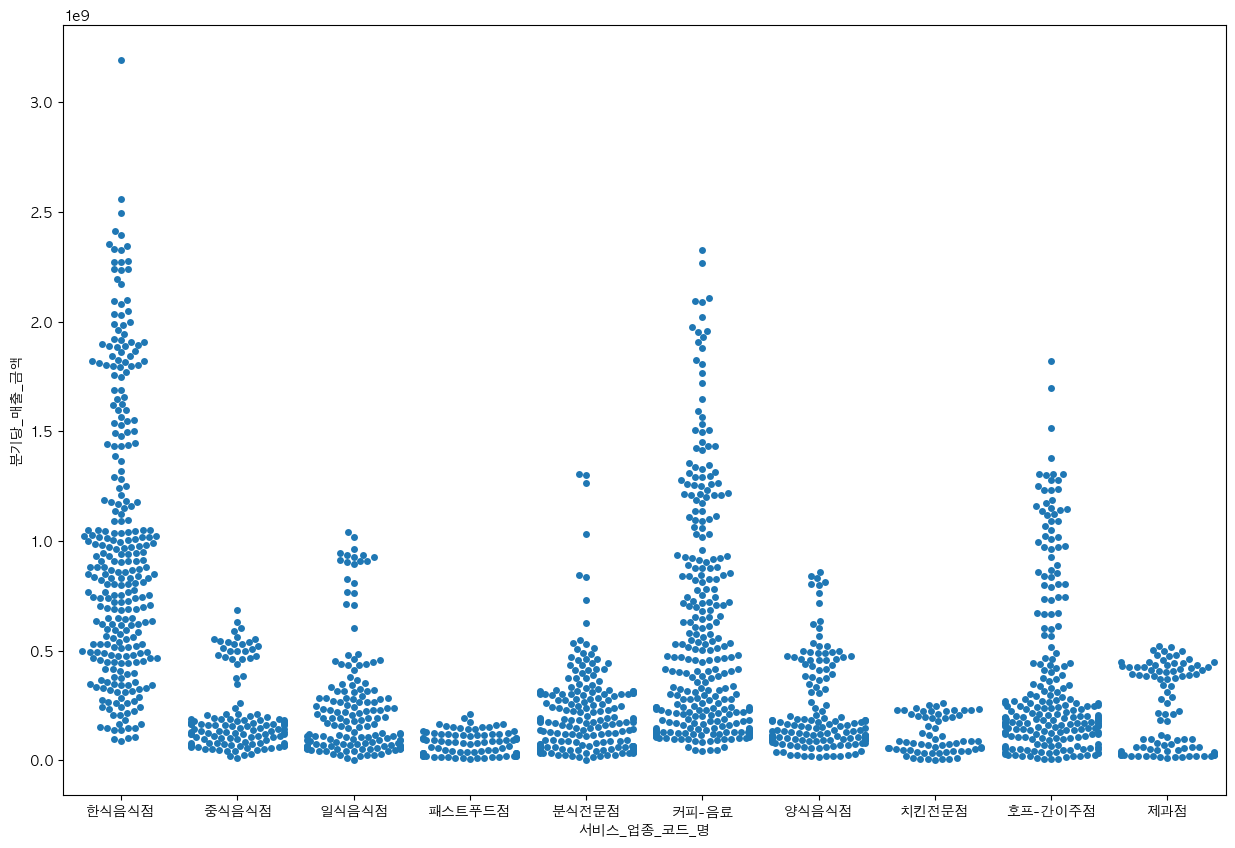

In [11]:
plt.figure(figsize=(15,10))

sns.swarmplot(
    x='서비스_업종_코드_명',
    y='분기당_매출_금액',
    data=food
)

plt.show()

### 한식음식점의 경우에만 분포가 다른 것으로 판단하였다. 그러므로 한식음식점인지 아닌지에 따라서만 feature로 추가하려 한다.

In [12]:
food['한식음식점여부']=[1 if i == '한식음식점' else 0 for i in food['서비스_업종_코드_명']]
food.head()

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,시간대_06~11_매출_비율,연령대_20_매출_비율,점포수,한식음식점여부
0,2021,1,1000466,동교로17길,CS100001,한식음식점,243935896,1,14,14,1
1,2021,1,1000466,동교로17길,CS100002,중식음식점,45393178,0,19,1,0
2,2021,1,1000466,동교로17길,CS100003,일식음식점,55589434,0,22,3,0
3,2021,1,1000466,동교로17길,CS100006,패스트푸드점,9925407,5,36,3,0
4,2021,1,1000466,동교로17길,CS100008,분식전문점,40136157,0,30,6,0


#### 상권코드명 별 서비스업종별을 나누었을 때는 확연히 많이 불리되는 것처럼 느껴졌지만, 이렇게 되면 데이터 수가 헌저히 낮아져서 예측이 불가능하여 범주형 데이터는 이런식으로만 분류하려고 한다. 

In [13]:
food.to_csv('./Data/seogyodong+korean.csv',index=False)

### 분기에 따라 다른지도 파악하자

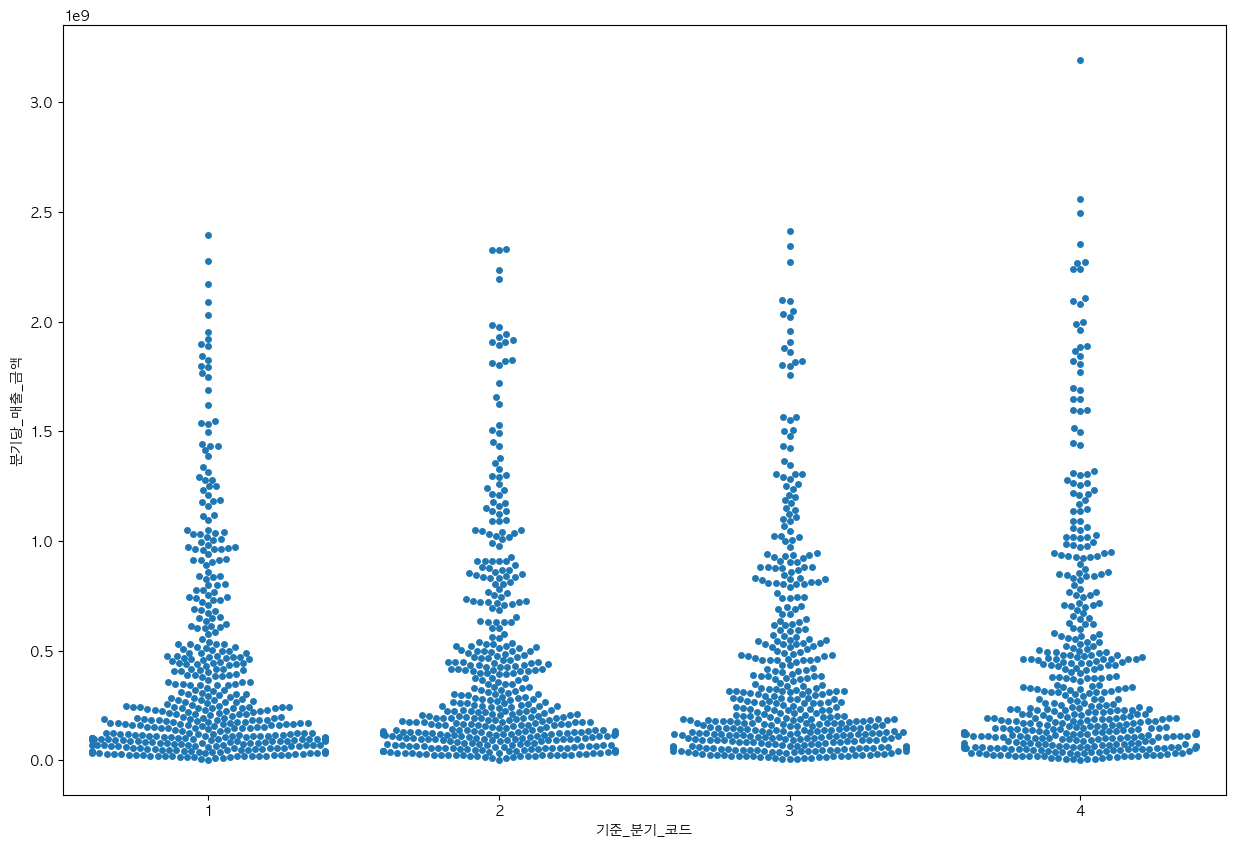

In [14]:
plt.figure(figsize=(15,10))

sns.swarmplot(
    x='기준_분기_코드',
    y='분기당_매출_금액',
    data=food
)

plt.show()

### 얘도 밑에 다 깔린다 이말이다 그러므로 사용 안된다. 분기별로 외식업의 매출 차이는 크지 않은 것 같다. 